In [49]:
import torchaudio
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
import torch
import os  

# Load Wav2Vec2Processor and ASR model (pre-configured for speech-to-text)
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-960h-lv60-self")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-960h-lv60-self")

# Path to the TIMIT dataset audio filesn
timit_path = r"timit\data\TRAIN\DR1\FCJF0"
audio_file = os.path.join(timit_path, "SA1.WAV")

# Load and preprocess the audio file
waveform, sample_rate = torchaudio.load(audio_file)
if sample_rate != 16000:
    waveform = torchaudio.transforms.Resample(sample_rate, 16000)(waveform)

# Process and tokenize the waveform
inputs = processor(waveform.squeeze(), sampling_rate=16000, return_tensors="pt", padding=True)

# Perform ASR prediction
with torch.no_grad():
    logits = model(inputs.input_values).logits
predicted_ids = torch.argmax(logits, dim=-1)
predicted_text = processor.batch_decode(predicted_ids)[0]

print("Predicted Text:", predicted_text)


Some weights of the model checkpoint at facebook/wav2vec2-large-960h-lv60-self were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h-lv60-self and are newly initialized: ['wav2vec2.masked_spec_embed', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weig

Predicted Text: SHE HAD YO DUCK SUIT AND GREASY WASHWATER ALL YEAR


In [50]:
ground_truth_text = "She had your dark suit in greasy wash water all year"

Word Error Rate: 0.45454545454545453
Match Error Rate: 0.45454545454545453
Word Information Lost Rate: 0.6727272727272728


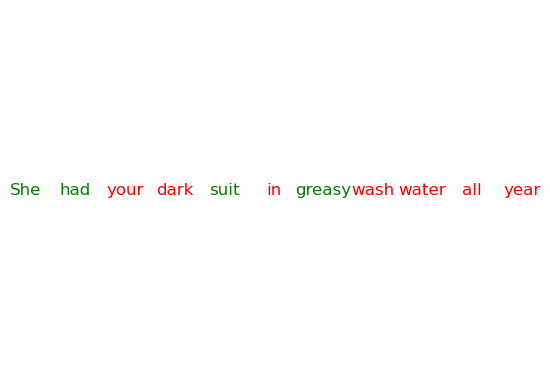

In [51]:
from jiwer import wer, mer, wil
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

error_rate = wer(ground_truth_text.lower(), predicted_text.lower())
print("Word Error Rate:", error_rate)

match_error_rate = mer(ground_truth_text.lower(), predicted_text.lower())
wil_rate = wil(ground_truth_text.lower(), predicted_text.lower())
print("Match Error Rate:", match_error_rate)
print("Word Information Lost Rate:", wil_rate)

def visualize_pronunciation(ground_truth, prediction):
    ground_truth_words = ground_truth.split()
    predicted_words = prediction.split()
    
    fig, ax = plt.subplots()
    for idx, word in enumerate(ground_truth_words):
        color = 'green' if idx < len(predicted_words) and word.lower() == predicted_words[idx].lower() else 'red'
        ax.text(idx * 0.1, 0.5, word, color=color, fontsize=12, ha='center')
    ax.axis('off')
    plt.show()

visualize_pronunciation(ground_truth_text, predicted_text)

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

ImportError: cannot import name '_HTMLDocumentationLinkMixin' from 'sklearn.utils._estimator_html_repr' (d:\Anaconda\Lib\site-packages\sklearn\utils\_estimator_html_repr.py)

In [ ]:

def plot_performance_metrics(accuracy, precision, recall, f1):
    metrics = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="Blues_d")
    plt.ylim(0, 1)
    plt.title("Pronunciation Prediction Model Performance Metrics")
    plt.ylabel("Score")
    plt.xlabel("Metric")
    plt.show()


In [ ]:

def get_labels(ground_truth, prediction):
    ground_truth_words = ground_truth.split()
    predicted_words = prediction.split()
    labels = [1 if gt.lower() == pd.lower() else 0 for gt, pd in zip(ground_truth_words, predicted_words)]
    return labels

labels = get_labels(ground_truth_text, predicted_text)
accuracy = accuracy_score([1]*len(labels), labels)
precision = precision_score([1]*len(labels), labels)
recall = recall_score([1]*len(labels), labels)
f1 = f1_score([1]*len(labels), labels)

plot_performance_metrics(accuracy, precision, recall, f1)


NameError: name 'accuracy_score' is not defined

In [ ]:
import matplotlib.pyplot as plt
import torchaudio

def visualize_audio_with_text_overlay(waveform, ground_truth, prediction, sample_rate=16000):
    ground_truth_words = ground_truth.split()
    predicted_words = prediction.split()

    total_time = waveform.size(0) / sample_rate
    word_times = np.linspace(0, total_time, len(ground_truth_words) + 1)

    fig, ax = plt.subplots()
    ax.plot(np.linspace(0, total_time, waveform.size(0)), waveform.numpy(), label="Audio Signal")
    
    for idx, word in enumerate(ground_truth_words):
        color = 'green' if idx < len(predicted_words) and word.lower() == predicted_words[idx].lower() else 'red'
        ax.text(word_times[idx], waveform.max(), word, color=color, fontsize=9, ha='center', va='bottom')
    
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Amplitude")
    plt.legend()
    plt.show()

visualize_audio_with_text_overlay(waveform, ground_truth_text, predicted_text)


ValueError: Image size of 587x980168 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>